In [1]:
import glob
import pandas as pd

# Path to the folder containing the CSV files
folder_path = "TFO Data\PPG\Clean PPG"

# Get the list of CSV files in the folder
file_list = glob.glob(folder_path + "\*.csv")
# print(file_list)

['TFO Data\\PPG\\Clean PPG\\HR4.csv', 'TFO Data\\PPG\\Clean PPG\\HR5.csv', 'TFO Data\\PPG\\Clean PPG\\HR6.csv', 'TFO Data\\PPG\\Clean PPG\\HR7.csv']


In [5]:
for file_path in file_list:
    df = pd.read_csv(file_path)
    num_channels = df.shape[1]
    print(f"File: {file_path}, Number of Channels: {num_channels}")

File: TFO Data\PPG\Clean PPG\HR4.csv, Number of Channels: 10
File: TFO Data\PPG\Clean PPG\HR5.csv, Number of Channels: 10
File: TFO Data\PPG\Clean PPG\HR6.csv, Number of Channels: 10
File: TFO Data\PPG\Clean PPG\HR7.csv, Number of Channels: 10


In [6]:
last_file_path = file_list[-1]
last_df = pd.read_csv(last_file_path)
channel_names = last_df.columns.tolist()
print(channel_names)

['Ch1volts_WL1', 'Ch2volts_WL1', 'Ch3volts_WL1', 'Ch4volts_WL1', 'Ch5volts_WL1', 'Ch1volts_WL2', 'Ch2volts_WL2', 'Ch3volts_WL2', 'Ch4volts_WL2', 'Ch5volts_WL2']


TFO Data\PPG\Clean PPG\HR4.csv
Plot of HR4.csv


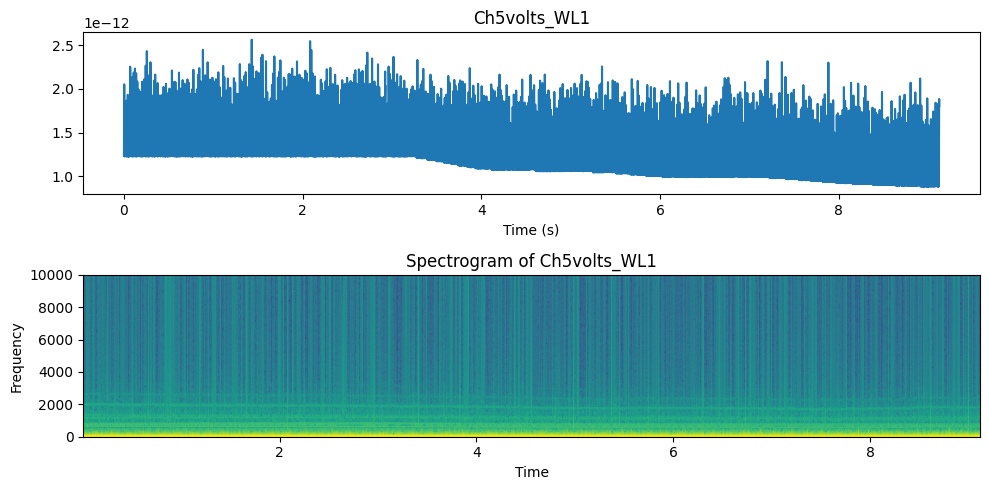

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fileNum = 0
channelNum = 4

file_path = file_list[fileNum]
channel = channel_names[channelNum]

print(file_path)

# Read the CSV file into a pandas dataframe
df = pd.read_csv(file_path)

selected_column = df[channel]

title = file_path.split("\\")[-1]
print(f"Plot of {title}")

Fs = 20000  # Sampling frequency

# Generate the time array using np.linspace
t = np.linspace(0, len(selected_column)/Fs, len(selected_column))

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Plot the time series
axes[0].plot(t, selected_column)
axes[0].set_title(channel)
axes[0].set_xlabel('Time (s)')

# Plot the spectrogram
axes[1].specgram(selected_column, Fs=Fs)
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Spectrogram of {channel}')

plt.tight_layout()
plt.show()

#### Adding Noise

Plot of HR4.csv


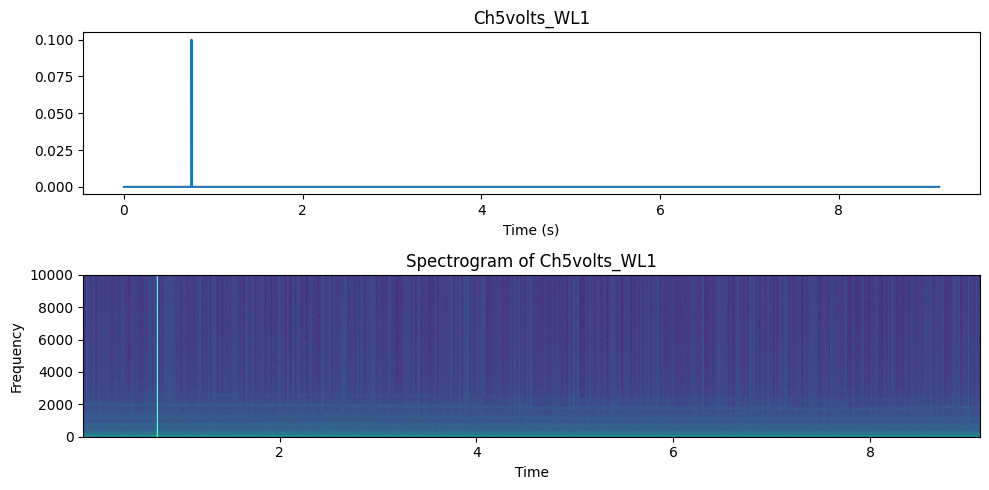

In [11]:
import random

# Create a copy of the dataframe
df_copy = df.copy()

# Select a random index in the dataframe
random_index = random.randint(0, len(df_copy) - 1)

# create shift
mean = 2
scale = 1 / mean

random_number = np.random.exponential(scale)

print(random_number)

# Add a DC shift to every point past the randomly selected index
df_copy.loc[random_index:] += 0.1

selected_column = df_copy[channel]

title = file_path.split("\\")[-1]
print(f"Plot of {title}")

Fs = 20000  # Sampling frequency

# Generate the time array using np.linspace
t = np.linspace(0, len(selected_column)/Fs, len(selected_column))

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Plot the time series
axes[0].plot(t, selected_column)
axes[0].set_title(channel)
axes[0].set_xlabel('Time (s)')

# Plot the spectrogram
axes[1].specgram(selected_column, Fs=Fs)
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Spectrogram of {channel}')

plt.tight_layout()
plt.show()